In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import pack_vis_sol
import pack_dynamics
import copy
import time
import pack_ga3
import pack_io
from IPython.display import HTML, display, clear_output


Detected environment: local


Loading cached lookup table from /mnt/d//packing/temp//lut_cache/exact_sep_Nx900_Ny900_Nt900_trimTrue_tree42d0f17d.lut_cache...
Successfully loaded cached lookup table
Loading cached lookup table from /mnt/d//packing/temp//lut_cache/exact_sep_Nx900_Ny900_Nt900_trimTrue_tree42d0f17d.lut_cache...
Successfully loaded cached lookup table
Loading cached lookup table from /mnt/d//packing/temp//lut_cache/exact_sep_Nx900_Ny900_Nt900_trimTrue_tree42d0f17d.lut_cache...
Successfully loaded cached lookup table
Loading cached lookup table from /mnt/d//packing/temp//lut_cache/exact_sep_Nx900_Ny900_Nt900_trimTrue_tree42d0f17d.lut_cache...
Successfully loaded cached lookup table


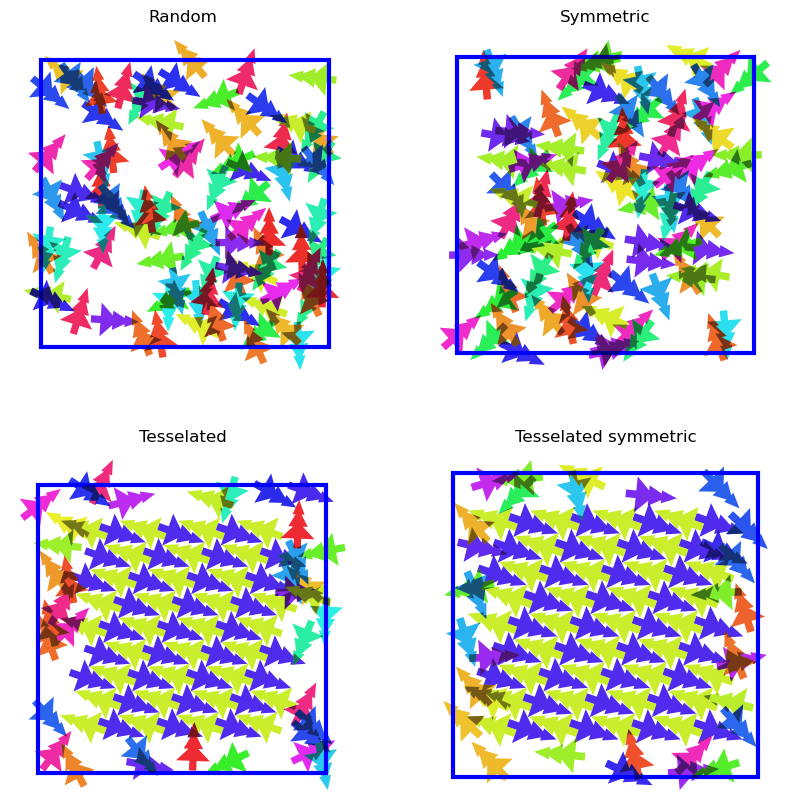

In [10]:
#%%pyinstrument
#kgs.profiling=True
# %matplotlib widget
#kgs.enable_module_profiling(kgs)
_,ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()
for i_mode, mode in enumerate(['Random', 'Symmetric', 'Tesselated', 'Tesselated symmetric']):
    import pack_ga3
    import pack_runner
    fastMode = False
    kgs.debugging_mode = 1

    match i_mode:
        case 0:
            runner = pack_ga3.baseline()
        case 1:
            runner = pack_ga3.baseline_symmetry_180()
        case 2:
            runner = pack_ga3.baseline_tesselated()
        case 3:
            runner = pack_ga3.baseline_symmetry_180_tesselated()
    runner.ga.ga_base.initializer.ref_sol_axis2_offset = lambda r:0.5

    runner.ga.N = 2
    runner.ga.ga_base.N_trees_to_do = 100
    runner.n_generations = 0
    runner.diagnostic_plot = True
    runner.seed = 1
    runner.plot_every = 1
    runner.ga.do_legalize = False

    self = runner
    if self._generator is None:
        self._generator = cp.random.default_rng(seed=self.seed)

    self.ga.fitness_cost = self.fitness_cost
    self.ga.seed = self.seed

    # Initialize
    self.ga.initialize(self._generator)
    self.ga.reset(self._generator)
    #self._relax(self.ga.get_list_for_simulation())    
    self.ga.score(self._generator, register_best=True)

    plt.sca(ax[i_mode])
    pack_vis_sol.pack_vis_sol(self.ga.champions[0].phenotype, margin_factor=0.03, ax=ax[i_mode])
    plt.axis('off')
    plt.title(mode)

Text(0.5, 1.0, 'X')

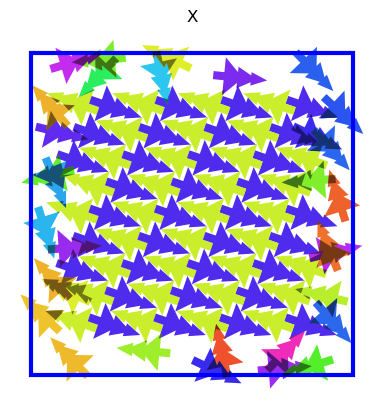